# IBM HR Analytics Employee Attrition Modelling

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

%matplotlib inline

In [2]:
# import csv and transform into dataframe
ibm_attrition_df = pd.DataFrame(pd.read_csv("C:\\Users\\aboag\\Downloads\\Data Analysis File\\ibm.csv"))
# you can add col-index = 0

In [3]:
# view top five(5) entries of dataset
ibm_attrition_df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


In [4]:
# view summary statistics of dataset
ibm_attrition_df.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [5]:
# view general dataset info
ibm_attrition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


Comment:
    
    The dataset contains 1470 rows (entries) and 13 columns (features). Four (4) of the 16 columns are of string (object) 
    datatypes and the rest are of integer datatypes

##  What is the distribution of age?

In [6]:
# create object for age column as a dataframe
age = pd.DataFrame(ibm_attrition_df['Age'])
# view first five entries
age.head()

,Age
0,41
1,49
2,37
3,33
4,27


### Method 1

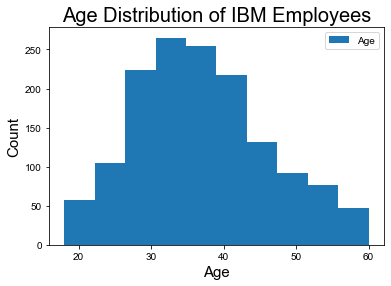

In [7]:
# plot histogram for age
age.plot(kind = 'hist')
# choose style to use
style.use('seaborn')
# set x-axis label
plt.xlabel('Age', fontsize = 15)
# set y-axis label
plt.ylabel('Count', fontsize = 15)
# set chart title
plt.title('Age Distribution of IBM Employees', fontsize = 20);

### Method 2: Using Seaborn

C:\Users\aboag\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


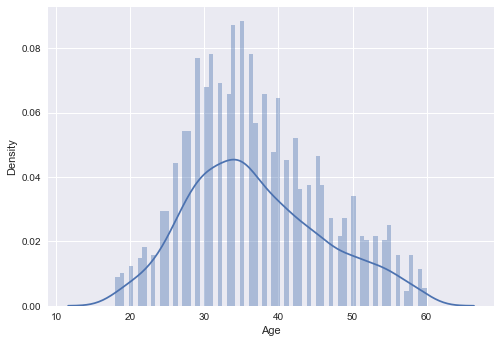

In [8]:
# use seaborn to create distribution plot
sns.distplot(ibm_attrition_df['Age'], kde = True, bins = 70); 
# second argument to remove trace line

Comment:

    The majority of IBM employees are between the ages of 28 and 47

## What is the distribution of attrition by age?

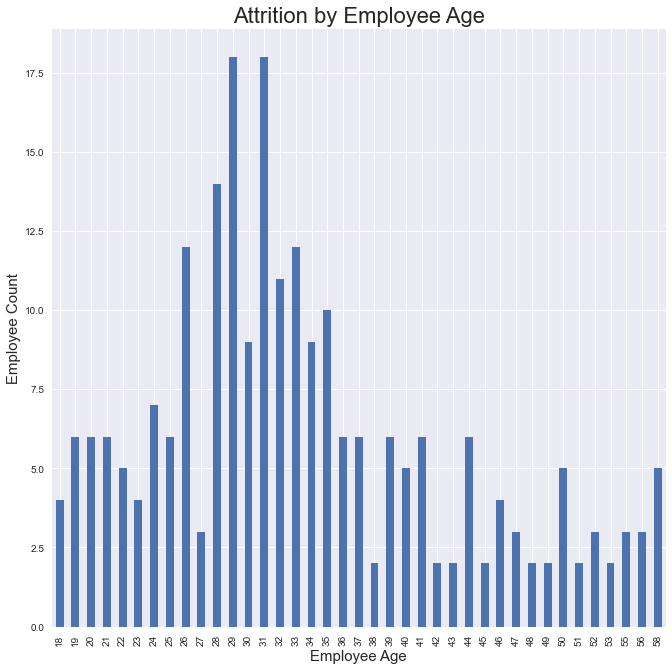

In [9]:
# set figure size
plt.figure(figsize=(11,11))
# Filter for resign employees and group by Age
ibm_attrition_df[ibm_attrition_df['Attrition']=="Yes"].groupby('Age').count()['Attrition'].plot(kind = 'bar')
# set x-axis label
plt.xlabel('Employee Age', fontsize=15)
# set y-axis label
plt.ylabel('Employee Count', fontsize= 15)
# set chart title
plt.title('Attrition by Employee Age', fontsize = 22);

Comment:

    Employees between the ages of 24 and 36 resign the most

## What is the distribution of attrition by Department?

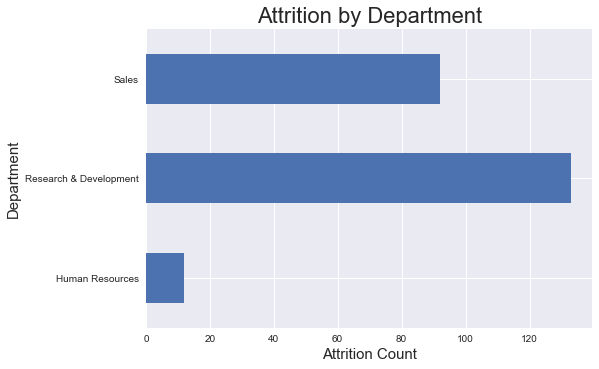

In [10]:
ibm_attrition_df[ibm_attrition_df['Attrition']=="Yes"].groupby('Department').count()['Attrition'].plot(kind = 'barh')
plt.ylabel('Department', fontsize= 15)
plt.xlabel('Attrition Count', fontsize=15)
plt.title('Attrition by Department', fontsize = 22);

Comment:

    Research and Department Employees resign the most. 
    Note: This could be because they have the highest number of employees as weel. A plot of proportions might reveal 
    something different. (Give it a try)

## 3. What is the correlation between Age and Attrition?

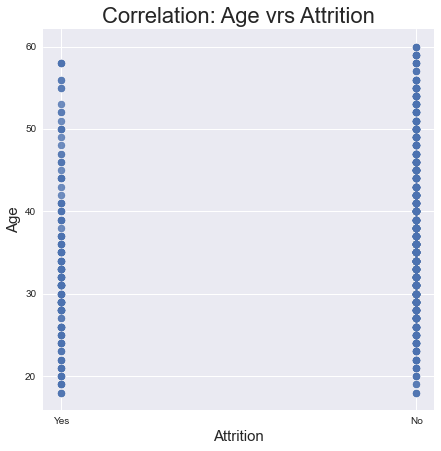

In [11]:
plt.figure(figsize=(7,7))
plt.scatter(ibm_attrition_df['Attrition'], ibm_attrition_df['Age'], alpha = .55)
plt.xlabel('Attrition', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
plt.title('Correlation: Age vrs Attrition', fontsize = 22);
# plt.grid(b=True, which='major',axis='y')

Comment:

    There is no correlation between employee age and attrition

## What is the Employee Distibution by Education Field

In [12]:
# group data by educational field
edu_field = pd.DataFrame(ibm_attrition_df.value_counts('EducationField'))
edu_field

,0
EducationField,
Life Sciences,606
Medical,464
Marketing,159
Technical Degree,132
Other,82
Human Resources,27


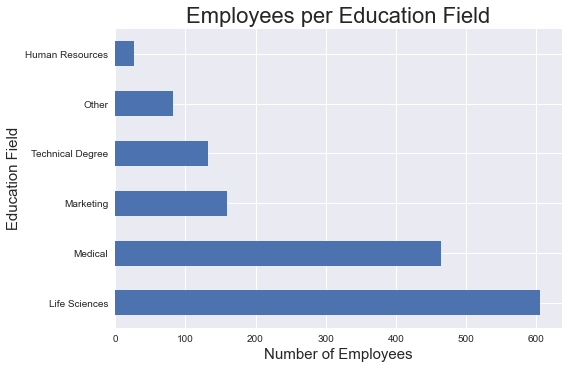

In [13]:
# plot bar chart of group data
# use "barh" to plot bar charts in a horizontal orientation
edu_field.plot(kind = 'barh')
# set x-axis label
plt.xlabel('Number of Employees', fontsize= 15)
# set y-axis label
plt.ylabel('Education Field', fontsize= 15)
# set chart title
plt.title('Employees per Education Field', fontsize = 22)
# remove legend display
plt.legend([]);

## What are the different Education Field of the Employees?

In [14]:
ibm_attrition_df['EducationField'].nunique()

6

In [15]:
#get unique items in a specific column
ibm_attrition_df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

Comment:
    
    All employees belong to either of 6 education field. These are Life Sciences, Medical, Marketing,
    Technical Degree, Human Resources and Other fields

## What is the Employee Distribution According to Marital Status?

In [16]:
# plot 1
# group data by marital status
marital_status = ibm_attrition_df.value_counts('MaritalStatus')
marital_status

MaritalStatus
Married     673
Single      470
Divorced    327
dtype: int64

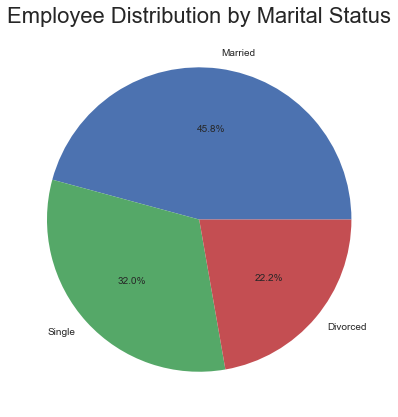

In [17]:
# Select first two rows and plot
# married_single = marital_status.plot(kind = 'pie')

plt.figure(figsize=(7,7))
plt.pie(marital_status, labels=marital_status.index, autopct='%1.1f%%')
plt.title("Employee Distribution by Marital Status", fontsize=22);



Comment:

    The married forms the highest population of IBMs workforce i.e. 45.8 %

# Creating Machine Learning Model for Dataset

In [18]:
# create dummy variables for categorical data (text data)
ibm_dummies = pd.get_dummies(ibm_attrition_df, columns = ['Attrition', 'Department', 'EducationField', 'MaritalStatus'])
# view top five entries
ibm_dummies.head()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Attrition_No,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,0,...,1,0,1,0,0,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,1,...,0,0,1,0,0,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,0,...,0,0,0,0,0,1,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,1,...,0,0,1,0,0,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,1,...,0,0,0,0,1,0,0,0,1,0


In [19]:
# merge dummies with original dataset using concate method.
# axis defines how you want the join either on the rows or the columns

merged_ibm_data = pd.concat([ibm_attrition_df,ibm_dummies], axis = 'columns')
# view entire dataset
merged_ibm_data

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,...,1,0,1,0,0,0,0,0,0,1
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,...,0,0,1,0,0,0,0,0,1,0
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,...,0,0,0,0,0,1,0,0,0,1
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,...,0,0,1,0,0,0,0,0,1,0
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Research & Development,23,2,Medical,3,4,Married,2571,...,0,0,0,0,1,0,0,0,1,0
1466,39,No,Research & Development,6,1,Medical,4,1,Married,9991,...,0,0,0,0,1,0,0,0,1,0
1467,27,No,Research & Development,4,3,Life Sciences,2,2,Married,6142,...,0,0,1,0,0,0,0,0,1,0
1468,49,No,Sales,2,3,Medical,4,2,Married,5390,...,1,0,0,0,1,0,0,0,1,0


In [20]:
# drop orginal columns on which dummies were created
# specify axis as columns
merged_ibm_data = merged_ibm_data.drop(['Attrition', 'Department', 'EducationField', 'MaritalStatus'], axis = 'columns')
# view resulting dataset
merged_ibm_data

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age,...,Department_Sales,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,41,...,1,0,1,0,0,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,49,...,0,0,1,0,0,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,37,...,0,0,0,0,0,1,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,33,...,0,0,1,0,0,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,27,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2571,4,3,5,36,...,0,0,0,0,1,0,0,0,1,0
1466,39,6,1,4,1,9991,4,3,7,39,...,0,0,0,0,1,0,0,0,1,0
1467,27,4,3,2,2,6142,1,3,6,27,...,0,0,1,0,0,0,0,0,1,0
1468,49,2,3,4,2,5390,2,2,9,49,...,1,0,0,0,1,0,0,0,1,0


In [21]:
# now drop one dummy column from each of the categories. (NB: Optimum dummies = numbers of dummies - 1)
# Specify axis as columns
final_ibm_data = merged_ibm_data.drop(['Attrition_No', 'Department_Sales', 'EducationField_Other', 
                                       'MaritalStatus_Divorced'], axis = 'columns')

# view final_ibm_data
final_ibm_data

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany,Age,...,Attrition_Yes,Department_Human Resources,Department_Research & Development,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Technical Degree,MaritalStatus_Married,MaritalStatus_Single
0,41,1,2,2,4,5993,8,1,6,41,...,1,0,0,0,1,0,0,0,0,1
1,49,8,1,3,2,5130,1,3,10,49,...,0,0,1,0,1,0,0,0,1,0
2,37,2,2,4,3,2090,6,3,0,37,...,1,0,1,0,0,0,0,0,0,1
3,33,3,4,4,3,2909,1,3,8,33,...,0,0,1,0,1,0,0,0,1,0
4,27,2,1,1,2,3468,9,3,2,27,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,23,2,3,4,2571,4,3,5,36,...,0,0,1,0,0,0,1,0,1,0
1466,39,6,1,4,1,9991,4,3,7,39,...,0,0,1,0,0,0,1,0,1,0
1467,27,4,3,2,2,6142,1,3,6,27,...,0,0,1,0,1,0,0,0,1,0
1468,49,2,3,4,2,5390,2,2,9,49,...,0,0,0,0,0,0,1,0,1,0


In [22]:
# create x and y data sets (Dependant and independent variables / features and target)

# create features by dropping the target from the final dataset
#specify axis as columns
x_features = final_ibm_data.drop('Attrition_Yes', axis = 'columns')

# create target by calling the Attrition_column as an object
y_target = final_ibm_data['Attrition_Yes']

In [23]:
# import model class from sklearn library
from sklearn.linear_model import LogisticRegression

# create model class object
logreg_model = LogisticRegression()

# import splitting model
from sklearn.model_selection import train_test_split as tts

In [24]:
# create train and test datasets
# use random state to ensure identical split each time
# use test_size or train_size to specify percentage of dataset for testing of training respectively as decimals
x_train, x_test, y_train, y_test = tts(x_features,y_target, test_size=0.4, random_state=1)

In [25]:
# confirm that split data sets have same shapes
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(882, 27)
(882,)
(588, 27)
(588,)


In [26]:
# train model by fit train dataset into model
trained_logreg_model = logreg_model.fit(x_train,y_train)
trained_logreg_model

C:\Users\aboag\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
# predict target values using test data
attrition_predict = logreg_model.predict(x_test)
attrition_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [28]:
# check accuracy of model. Method 1
logreg_model.score(x_train,y_train)

0.8469387755102041

Comment:
    
    The model has a prediction accuracy of approximately 84.7 %

In [29]:
# Alternatively. Method 2
from sklearn import metrics
metrics.accuracy_score(y_test, attrition_predict)

0.826530612244898